<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

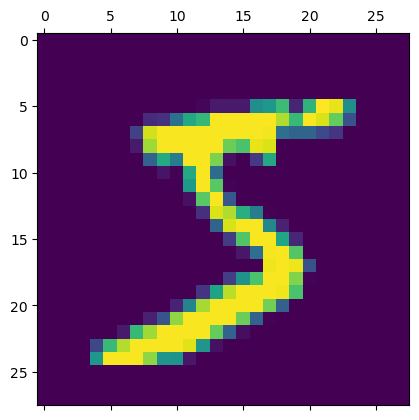

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6398 - accuracy: 0.8387
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3409 - accuracy: 0.9042
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2947 - accuracy: 0.9171
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2659 - accuracy: 0.9255
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2436 - accuracy: 0.9325


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.07848084,  0.0637615 , -0.07719681, ...,  0.02666408,
         -0.07870209, -0.04922795],
        [-0.0451895 ,  0.03460073, -0.07948199, ..., -0.01874217,
         -0.02884562,  0.01414193],
        [-0.0737766 , -0.00221521, -0.08203596, ...,  0.07755119,
          0.03197467,  0.0346235 ],
        ...,
        [ 0.0732359 ,  0.01921575, -0.08104745, ...,  0.01937748,
          0.03200802,  0.02870973],
        [ 0.07440996, -0.06095089,  0.04474841, ..., -0.07552098,
         -0.08134349,  0.06242806],
        [ 0.04827479,  0.05297382,  0.06770004, ..., -0.02417724,
         -0.03357818,  0.03124314]], dtype=float32),
 array([ 0.02062528,  0.11175661,  0.04112726,  0.13766636, -0.07958476,
         0.02337895,  0.06766786, -0.00204949,  0.14348468,  0.18819521,
        -0.07983966, -0.16954307,  0.01643891,  0.13972278,  0.04294486,
        -0.01164768, -0.01741035,  0.13495736,  0.03176629, -0.09394876,
        -0.05811829,  0.15810947, -0.05615604,  0.00734393,  0.043